In [1]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [2]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

In [3]:
nc.variables

OrderedDict([('time', <scipy.io.netcdf.netcdf_variable at 0x22070b77fc8>),
             ('time_bnds', <scipy.io.netcdf.netcdf_variable at 0x22070b80108>),
             ('longitude', <scipy.io.netcdf.netcdf_variable at 0x2206ff59bc8>),
             ('latitude', <scipy.io.netcdf.netcdf_variable at 0x22070b802c8>),
             ('level', <scipy.io.netcdf.netcdf_variable at 0x22070b80488>),
             ('u', <scipy.io.netcdf.netcdf_variable at 0x22070b80708>)])

In [4]:
nc.dimensions

OrderedDict([('time', None),
             ('bnds', 2),
             ('longitude', 512),
             ('latitude', 256),
             ('level', 37)])

In [5]:
times = nc.variables["time"]
u = nc.variables["u"]

In [6]:
u.shape

(12, 37, 256, 512)

In [7]:
u[0, 0, 0, 0]

-34.00075

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


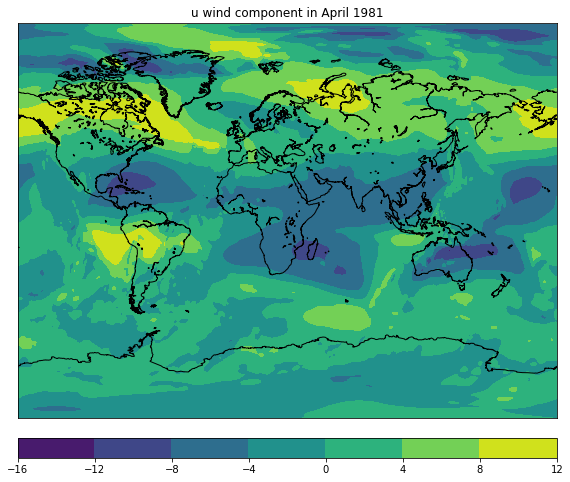

In [10]:
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=30,resolution='l')
m.drawcoastlines()

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, u[5,-1,:,:]) # variate 2nd dimension for different altitudes, -1 is ground level
cbar = m.colorbar(cs,location='bottom',pad="5%")
plt.title("u wind component in April 1981")
plt.show()